## getting data from youtube link


In [101]:
vidLink = "https://www.youtube.com/watch?v=GBb8vC0DeXY"
MAX = 1000 # comments limited to

In [261]:
# -*- coding: utf-8 -*-

# Sample Python code for youtube.commentThreads.list
# See instructions for running these code samples locally:
# https://developers.google.com/explorer-help/code-samples#python

import os
import pandas as pd

import googleapiclient.discovery

def comments_from_link(video_link):
    # Disable OAuthlib's HTTPS verification when running locally.
    # *DO NOT* leave this option enabled in production.
    #https://www.youtube.com/watch?v=8wR9y9nMZXM           sample video link
    file = open("API_KEY",'r')                  #opening the file containg my API key
    vID = video_link.partition("?v=")[2]        #extracting video id from link
    
    os.environ["OAUTHLIB_INSECURE_TRANSPORT"] = "1"

    api_service_name = "youtube"
    api_version = "v3"
    DEVELOPER_KEY = file.read()                  #reading the API key from the file, did this for security purpose

    youtube = googleapiclient.discovery.build(
        api_service_name, api_version, developerKey = DEVELOPER_KEY)

    request = youtube.commentThreads().list(
        part="snippet,replies",
        videoId=vID, order='time', maxResults=100
    )
    response = request.execute()
    comments = []
    commenter = []
    publishedAt = []
    totalReplyCount = []
    for item in response['items']:                  #get all top level comments on the first page of the video
        comments.append(item['snippet']['topLevelComment']['snippet']['textOriginal'])
        commenter.append(item['snippet']['topLevelComment']['snippet']['authorDisplayName'])
        publishedAt.append(item['snippet']['topLevelComment']['snippet']['updatedAt'])
        totalReplyCount.append(item['snippet']['totalReplyCount'])
    next_page_token = response.get('nextPageToken')
    
    
#     df = pd.DataFrame()
    
    while next_page_token is not None:            #getting the comments on the next pages
#         if len(comments)>MAX:
#             break
        request = youtube.commentThreads().list(
        part="snippet,replies",
        videoId=vID, order='time', maxResults=100,
        pageToken = next_page_token
        )
        response = request.execute()
        
        for item in response['items']:                  #get all top level comments on the first page of the video
            comments.append(item['snippet']['topLevelComment']['snippet']['textOriginal'])
            commenter.append(item['snippet']['topLevelComment']['snippet']['authorDisplayName'])
            publishedAt.append(item['snippet']['topLevelComment']['snippet']['updatedAt'])
            totalReplyCount.append(item['snippet']['totalReplyCount'])
        
        next_page_token = response.get('nextPageToken')
    
    df = pd.DataFrame(list(zip(commenter, comments, publishedAt, totalReplyCount)),columns=["commenter", "comments", "publishedAt", "totalReplyCount"])
    
        
    return df
#       return response


In [262]:
# import json
# json.dumps(comments_from_link("https://www.youtube.com/watch?v=8wR9y9nMZXM"), indent = 2)

In [263]:
commentsData = comments_from_link(vidLink)

In [105]:
commentsData["publishedAt"] = pd.to_datetime(commentsData["publishedAt"])


In [106]:
commentsData

,commenter,comments,publishedAt,totalReplyCount
0,Lexi Jay,"I love swiftober, its so amazing",2023-10-21 18:54:49+00:00,0
1,Mayyy,taylor ily BUT GIRL WHAT IS THIS,2023-10-21 18:31:54+00:00,0
2,DogsOnFrogs,It’s a slay summer now,2023-10-21 18:14:01+00:00,0
3,lfitzgerald0624,Addicted to this,2023-10-21 18:12:04+00:00,0
4,_yasnary.x.JukiLiz_,❤,2023-10-21 17:59:33+00:00,0
...,...,...,...,...
1074,ʕ•ᴥ•ʔ▼・ᴥ・▼,I LOVE U TAYTAY<3,2023-10-19 01:29:48+00:00,0
1075,Hoàng Văn Minh,Gooooo,2023-10-19 01:29:27+00:00,0
1076,Ariana,YESSSS,2023-10-19 01:29:24+00:00,0
1077,Kevin Ortega,🫶🏻🫶🏻🫶🏻🫶🏻🫶🏻,2023-10-19 01:29:18+00:00,0


## we have got the data now we will begin cleaning the data

### let's know a little about the library we are about to use:

#### Pattern Matching: The "re" module allows you to define patterns that can be used to search, match, and manipulate strings. For example, you can use regular expressions to find all email addresses in a text, validate phone numbers, or extract specific patterns from a larger string.

#### Functions in the "re" Module: Some common functions provided by the "re" module include:

##### re.match(): Determines if the regular expression matches at the beginning of the string.
##### re.search(): Searches the entire string for a match.
##### re.findall(): Returns all non-overlapping matches as a list of strings.
##### rre.finditer(): Returns an iterator yielding match objects for all matches.
##### rre.sub(): Replaces occurrences of the pattern in a string.
##### rre.split(): Splits a string by the occurrences of the pattern.

# now we will fetch metadata about the channel in general from the 

In [265]:
import re
def get_metadata(video_link):
    # Disable OAuthlib's HTTPS verification when running locally.
    # *DO NOT* leave this option enabled in production.
    #https://www.youtube.com/watch?v=Ks-_Mh1QhMc           sample video link
    file = open("API_KEY",'r')                  #opening the file containg my API key
    vID = video_link.partition("?v=")[2]        #extracting video id from link
    
    os.environ["OAUTHLIB_INSECURE_TRANSPORT"] = "1"

    api_service_name = "youtube"
    api_version = "v3"
    DEVELOPER_KEY = file.read()                  #reading the API key from the file, did this for security purpose

    youtube = googleapiclient.discovery.build(
        api_service_name, api_version, developerKey = DEVELOPER_KEY)

    request = youtube.videos().list(
        part="snippet,contentDetails,statistics",
        id=vID
    )
    response = request.execute()

    video_item = response["items"][0]  # Access the first video item

    dic = {
    "videoTitle": video_item["snippet"]["title"],
    "videoDescription": video_item["snippet"]["description"],
    "channelName": video_item["snippet"]["channelTitle"],
#     "tags": video_item["snippet"]["tags"],
    "videoPublishTime": video_item["snippet"]["publishedAt"],
    "vidLen(sec)": video_item["contentDetails"]["duration"],
    "viewCount": video_item["statistics"]["viewCount"],
    "likeCount": video_item["statistics"]["likeCount"],
    "commentCount": video_item["statistics"]["commentCount"]
    }
    
    return dic


### meta data about video achieved
now we have meta data about the video now we will clean the metadata using various techniques

In [108]:
response = get_metadata(vidLink)
# response["videoDescription"]

In [109]:
# removing urls from the video description
response["videoDescription"] = re.sub(r"(http.+)|(\n)","",response["videoDescription"])

In [110]:
# changing vidLen string into seconds
k = re.search(r"(?<=PT)(?P<min>\d+)(?:M)(?P<sec>\d+)",response["vidLen(sec)"])
response["vidLen(sec)"] = int(k[1])*60 + int(k[2])

In [111]:
videoMetaData = pd.Series(response)
videoMetaData

videoTitle              Taylor Swift - Cruel Summer (LP Giobbi Remix)
videoDescription    Listen to the "Cruel Summer (LP Giobbi Remix)"...
channelName                                              Taylor Swift
tags                [taylor swift - cruel summer lyrics, cruel sum...
videoPublishTime                                 2023-10-19T00:30:06Z
vidLen(sec)                                                       199
viewCount                                                      396404
likeCount                                                       50529
commentCount                                                     3655
dtype: object

In [112]:
videoMetaData["videoPublishTime"] = pd.to_datetime(videoMetaData["videoPublishTime"])

In [113]:
videoMetaData

videoTitle              Taylor Swift - Cruel Summer (LP Giobbi Remix)
videoDescription    Listen to the "Cruel Summer (LP Giobbi Remix)"...
channelName                                              Taylor Swift
tags                [taylor swift - cruel summer lyrics, cruel sum...
videoPublishTime                            2023-10-19 00:30:06+00:00
vidLen(sec)                                                       199
viewCount                                                      396404
likeCount                                                       50529
commentCount                                                     3655
dtype: object

## now we have clean metadata as well as comments
now let's generate sentiment scores for individual comments with the help of VADER

In [114]:
from nltk.sentiment import SentimentIntensityAnalyzer
from tqdm.notebook import tqdm
SIA=SentimentIntensityAnalyzer()

In [115]:
results={}
for i,row in tqdm(commentsData.iterrows(),total=len(commentsData)):
    text=row["comments"]
    myid=row["commenter"]
    results[myid]=SIA.polarity_scores(text)
Vaders=pd.DataFrame(results).T
Vaders= Vaders.reset_index().rename(columns={'index': 'commenter'})
commentsData=Vaders.merge(commentsData,how='left')
commentsData

  0%|          | 0/1079 [00:00<?, ?it/s]

,commenter,neg,neu,pos,compound,comments,publishedAt,totalReplyCount
0,Lexi Jay,0.0,0.249,0.751,0.8769,"I love swiftober, its so amazing",2023-10-21 18:54:49+00:00,0
1,Mayyy,0.0,0.690,0.310,0.4019,taylor ily BUT GIRL WHAT IS THIS,2023-10-21 18:31:54+00:00,0
2,DogsOnFrogs,0.0,1.000,0.000,0.0000,It’s a slay summer now,2023-10-21 18:14:01+00:00,0
3,lfitzgerald0624,0.0,1.000,0.000,0.0000,Addicted to this,2023-10-21 18:12:04+00:00,0
4,_yasnary.x.JukiLiz_,0.0,0.000,0.000,0.0000,❤,2023-10-21 17:59:33+00:00,0
...,...,...,...,...,...,...,...,...
1074,Hoàng Văn Minh,0.0,1.000,0.000,0.0000,Gooooo,2023-10-19 01:29:27+00:00,0
1075,ʕ•ᴥ•ʔ▼・ᴥ・▼,0.0,0.192,0.808,0.6369,I LOVE U TAYTAY<3,2023-10-19 01:29:48+00:00,0
1076,Ariana,0.0,1.000,0.000,0.0000,YESSSS,2023-10-19 01:29:24+00:00,0
1077,Kevin Ortega,0.0,1.000,0.000,0.0000,🫶🏻🫶🏻🫶🏻🫶🏻🫶🏻,2023-10-19 01:29:18+00:00,0


In [116]:
commentsData["sentiment"] = pd.cut(commentsData["compound"], bins=[-1,-0.05,0.05,1], labels=["negative", "neutral", "positive"])

In [117]:
commentsData

,commenter,neg,neu,pos,compound,comments,publishedAt,totalReplyCount,sentiment
0,Lexi Jay,0.0,0.249,0.751,0.8769,"I love swiftober, its so amazing",2023-10-21 18:54:49+00:00,0,positive
1,Mayyy,0.0,0.690,0.310,0.4019,taylor ily BUT GIRL WHAT IS THIS,2023-10-21 18:31:54+00:00,0,positive
2,DogsOnFrogs,0.0,1.000,0.000,0.0000,It’s a slay summer now,2023-10-21 18:14:01+00:00,0,neutral
3,lfitzgerald0624,0.0,1.000,0.000,0.0000,Addicted to this,2023-10-21 18:12:04+00:00,0,neutral
4,_yasnary.x.JukiLiz_,0.0,0.000,0.000,0.0000,❤,2023-10-21 17:59:33+00:00,0,neutral
...,...,...,...,...,...,...,...,...,...
1074,Hoàng Văn Minh,0.0,1.000,0.000,0.0000,Gooooo,2023-10-19 01:29:27+00:00,0,neutral
1075,ʕ•ᴥ•ʔ▼・ᴥ・▼,0.0,0.192,0.808,0.6369,I LOVE U TAYTAY<3,2023-10-19 01:29:48+00:00,0,positive
1076,Ariana,0.0,1.000,0.000,0.0000,YESSSS,2023-10-19 01:29:24+00:00,0,neutral
1077,Kevin Ortega,0.0,1.000,0.000,0.0000,🫶🏻🫶🏻🫶🏻🫶🏻🫶🏻,2023-10-19 01:29:18+00:00,0,neutral


# now we are finished with our dataset. now it's time to playyy

In [118]:
# lets start by making word cloud
!pip install wordcloud

In [119]:
import pandas as pd
import matplotlib.pyplot as plt
from wordcloud import WordCloud

In [120]:
!pip install spaCy

In [121]:
import spacy

In [122]:
!python -m spacy download en_core_web_sm


     ---------------------------------------- 0.0/12.8 MB ? eta -:--:--
     ---------------------------------------- 0.0/12.8 MB 1.9 MB/s eta 0:00:07
     --------------------------------------- 0.1/12.8 MB 653.6 kB/s eta 0:00:20
     --------------------------------------- 0.1/12.8 MB 798.9 kB/s eta 0:00:16
      -------------------------------------- 0.2/12.8 MB 952.6 kB/s eta 0:00:14
      -------------------------------------- 0.2/12.8 MB 857.5 kB/s eta 0:00:15
      -------------------------------------- 0.2/12.8 MB 857.5 kB/s eta 0:00:15
      -------------------------------------- 0.3/12.8 MB 886.2 kB/s eta 0:00:15
     - ------------------------------------- 0.3/12.8 MB 873.8 kB/s eta 0:00:15
     - ------------------------------------- 0.3/12.8 MB 873.8 kB/s eta 0:00:15
     - ------------------------------------- 0.4/12.8 MB 813.8 kB/s eta 0:00:16
     - ------------------------------------- 0.4/12.8 MB 813.6 kB/s eta 0:00:16
     - ------------------------------------- 0.5/

In [125]:
# load the english language
nlp = spacy.load("en_core_web_sm")

In [127]:
# a function to chekc if the token we are trying to make is actually a meaningful token 
def is_token_allowed(token):
    return bool(token and str(token).strip() and not token.is_stop and not token.is_punct)

In [128]:
# function to preprocess each token at once
# lemmatization -- get the base word out of the token, e.g. "be" is lemma of "was"
# strip of extra space or punctuation
# convert all to lowercase
def preprocess_token(token):
    return token.lemma_.strip().lower()

In [146]:
def create_tokens(string):
    # create an object of spacy library
    nlp_text = nlp(string)
    complete_filtered_tokens = [preprocess_token(token) for token in nlp_text if is_token_allowed(token)]
#     print(complete_filtered_tokens)
    # remove if it is of length 1, i.e. emoticons and other symbols etc.
    complete_filtered_tokens = [x for x in complete_filtered_tokens if len(x)>1]
#     print(complete_filtered_tokens)
    complete_filtered_tokens = " ".join(complete_filtered_tokens)
    return complete_filtered_tokens

In [150]:
commentsData["tokens"] = commentsData["comments"].apply(create_tokens)

In [153]:
commentsData.head()

,commenter,neg,neu,pos,compound,comments,publishedAt,totalReplyCount,sentiment,tokens
0,Lexi Jay,0.0,0.249,0.751,0.8769,"I love swiftober, its so amazing",2023-10-21 18:54:49+00:00,0,positive,love swiftober amazing
1,Mayyy,0.0,0.690,0.310,0.4019,taylor ily BUT GIRL WHAT IS THIS,2023-10-21 18:31:54+00:00,0,positive,taylor ily girl
2,DogsOnFrogs,0.0,1.000,0.000,0.0000,It’s a slay summer now,2023-10-21 18:14:01+00:00,0,neutral,slay summer
3,lfitzgerald0624,0.0,1.000,0.000,0.0000,Addicted to this,2023-10-21 18:12:04+00:00,0,neutral,addict
4,_yasnary.x.JukiLiz_,0.0,0.000,0.000,0.0000,❤,2023-10-21 17:59:33+00:00,0,neutral,


In [152]:
# create a word cloud to see the most used words in the comments
def createCloud(text):
    word_cloud1 = WordCloud(collocations = False, background_color = 'white',
                            width = 4096, height = 2048).generate(text)

    plt.imshow(word_cloud1, interpolation='bilinear')
    plt.axis("off")
    plt.show()

In [160]:
allWords = " ".join(commentsData["tokens"])
posWords = " ".join(commentsData[commentsData["sentiment"]=="positive"]["tokens"])
negWords = " ".join(commentsData[commentsData["sentiment"]=="negative"]["tokens"])

## tags cloud

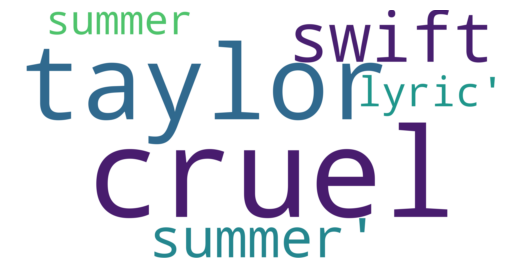

In [232]:
createCloud(str(list(map(create_tokens,videoMetaData["tags"]))))

## all word cloud

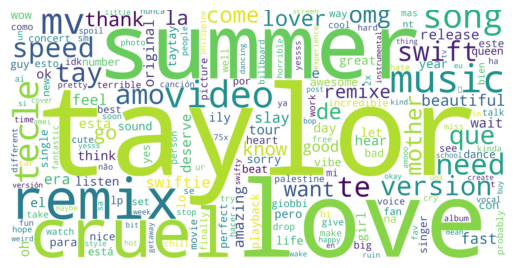

In [159]:
createCloud(allWords)

## negative word cloud

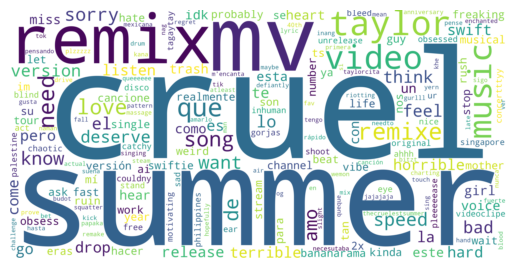

In [162]:
createCloud(negWords)

## positive word cloud

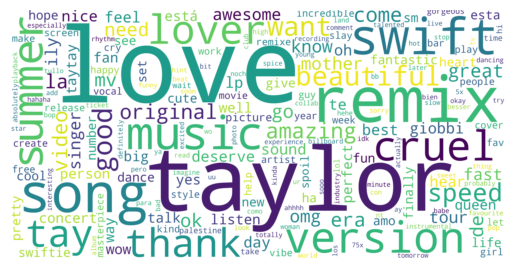

In [163]:
createCloudud(posWords)

In [164]:
videoMetaData

videoTitle              Taylor Swift - Cruel Summer (LP Giobbi Remix)
videoDescription    Listen to the "Cruel Summer (LP Giobbi Remix)"...
channelName                                              Taylor Swift
tags                [taylor swift - cruel summer lyrics, cruel sum...
videoPublishTime                            2023-10-19 00:30:06+00:00
vidLen(sec)                                                       199
viewCount                                                      396404
likeCount                                                       50529
commentCount                                                     3655
dtype: object

In [165]:
import seaborn as sns

## to see sentiment over a period of time

<Axes: xlabel='publishedAt', ylabel='compound'>

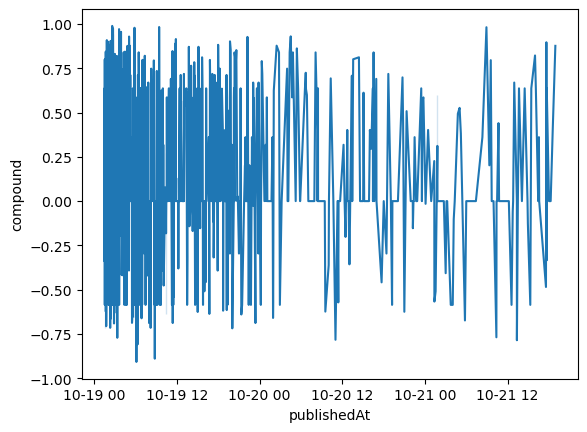

In [166]:

sns.lineplot(commentsData, x="publishedAt", y="compound")

In [219]:
# in case we need to find hashtags and mentions
def hashtag(string):
    return re.finditer("(?P<hashtag>#\w+)|(?P<mention>@\w+)",string)
    
sample = hashtag("i love tailor swift #swiftie for @life")

In [221]:
for l in sample:
    print(l["hashtag"],l["mention"])

#swiftie None
None @life


<BarContainer object of 3 artists>

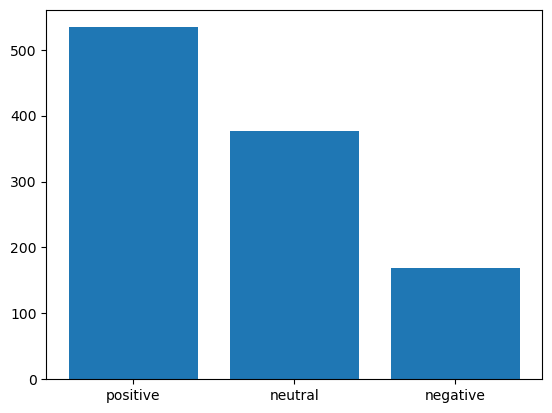

In [225]:
# comparison of negative positive and neutral reviews
plt.bar(commentsData["sentiment"].unique(), commentsData["sentiment"].value_counts().values)

In [236]:
"average length of a comment:",round(commentsData["comments"].apply(len).mean(),0)

('average length of a comment:', 38.0)

## potential idea
> we can also find out the most engaged comment by the users, most replies to or most liked but for that we will need to process whole data

In [239]:
lst1 = allWords.split(" ")

In [246]:
df = pd.DataFrame(lst1,columns=["word"])

In [256]:
df = df.value_counts().reset_index()
df["len"] = df["word"].apply(len)

In [258]:
df.columns = ["word", "frequency", "length"]

In [259]:
df

,word,frequency,length
0,taylor,196,6
1,love,181,4
2,summer,129,6
3,cruel,126,5
4,,110,0
...,...,...,...
1487,hermosaa,1,8
1488,heck,1,4
1489,hearts,1,6
1490,health,1,6


# frequency of a word vs length of the word

<Axes: xlabel='length', ylabel='frequency'>

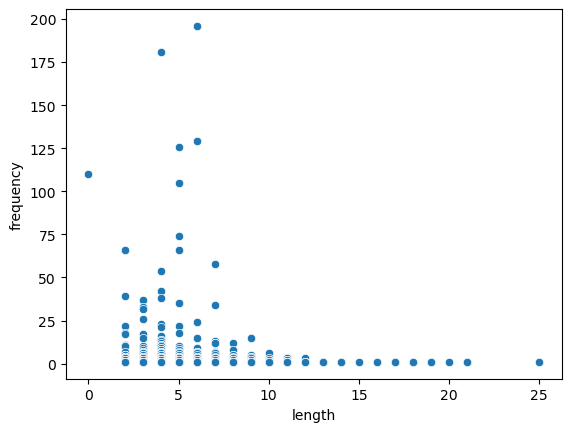

In [260]:
sns.scatterplot(data=df, x="length", y="frequency")

In [2]:
!pip install solara

  Obtaining dependency information for solara from https://files.pythonhosted.org/packages/f2/c1/885abf525990c2897f26735efed8f6e516a64cfb68ab9d21af45ca918f4e/solara-1.22.0-py2.py3-none-any.whl.metadata
  Obtaining dependency information for humanize from https://files.pythonhosted.org/packages/4a/52/cccfc7a0d3bcf52cca6f6e1792786075df979346d638bf4cf5bc8bf2be3c/humanize-4.8.0-py3-none-any.whl.metadata
  Obtaining dependency information for ipyvue>=1.9.0 from https://files.pythonhosted.org/packages/5f/dc/107a9756ce488fbf4bb2dc8c08a3c4a680c96f2c7476b5014e14e9b71868/ipyvue-1.10.1-py2.py3-none-any.whl.metadata
     ---------------------------------------- 0.0/11.7 MB ? eta -:--:--
     ---------------------------------------- 0.1/11.7 MB 3.6 MB/s eta 0:00:04
     - -------------------------------------- 0.4/11.7 MB 4.9 MB/s eta 0:00:03
     - -------------------------------------- 0.4/11.7 MB 3.2 MB/s eta 0:00:04
     -- ------------------------------------- 0.6/11.7 MB 3.4 MB/s eta 0:00:04


In [5]:
!pip install ipyvuetify ipyvue

In [7]:
import solara

# Declare reactive variables at the top level. Components using these variables
# will be re-executed when their values change.
sentence = solara.reactive("Solara makes our team more productive.")
word_limit = solara.reactive(10)


@solara.component
def Page():
    # Calculate word_count within the component to ensure re-execution when reactive variables change.
    word_count = len(sentence.value.split())

    solara.SliderInt("Word limit", value=word_limit, min=2, max=20)
    solara.InputText(label="Your sentence", value=sentence, continuous_update=True)

    # Display messages based on the current word count and word limit.
    if word_count >= int(word_limit.value):
        solara.Error(f"With {word_count} words, you passed the word limit of {word_limit.value}.")
    elif word_count >= int(0.8 * word_limit.value):
        solara.Warning(f"With {word_count} words, you are close to the word limit of {word_limit.value}.")
    else:
        solara.Success("Great short writing!")


# The following line is required only when running the code in a Jupyter notebook:
Page()

Cannot show ipywidgets in text